In [3]:
import networkx as nx
import matplotlib as plt

Create Graph

In [4]:
G = nx.Graph()
print(G.nodes)

[]


[(0, 0, 0), (1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)]


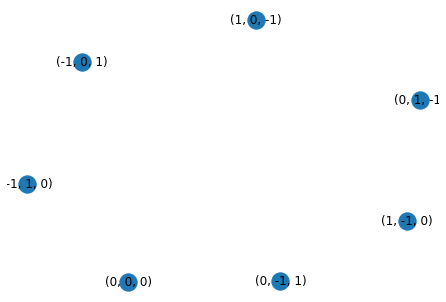

In [5]:
node_list = [(0,0,0), (1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)]
for node in node_list:
    G.add_node(node)
print(G.nodes)
nx.draw_spring(G, with_labels=True)

In [6]:
def node_generation(row, col):
    """Function for generating the correct (and correctly labeled nodes)"""
    node_list = []
    for x in range(row):
        for y in range(col):
            node_list.append((x, y, -(x+y)))
    return node_list


def add_nodes(node_list, graph):
    for node in node_list:
        graph.add_node(node)
    # nx.draw_spring(graph, with_labels=True)
    return graph


def consecutive_positions(node):
    # generate consecutive positions
    inner_ring_vectors = [(1, 0, -1), (1, -1, 0), (0, -1, 1), (-1, 0, 1), (-1, 1, 0), (0, 1, -1)] # consecutive vectors
    inner_ring_nodes = []
    for inner_ring_vector in inner_ring_vectors:
        # add each vector to the node
       # print(node, inner_ring_vector)
        consecutive_node = [
            a_i + b_i for a_i, b_i in zip(node, inner_ring_vector)]
       # print(consecutive_node)
        # add it to the list

        inner_ring_nodes.append(tuple(consecutive_node))

    return inner_ring_nodes



def find_consecutive_nodes(node, graph):
    """if consecutive_nodes are in the node list, then add them to list of edges that need to be joined together"""
    edge_list = [] # list of edges that need to be joined

    inner_ring_nodes = consecutive_positions(node) # list of positions consecutive to the nodes
    print(inner_ring_nodes)
    # if consecutive nodes are in the list of nodes in the graph
    for inner_ring_node in inner_ring_nodes:
        if inner_ring_node in graph.nodes:
            edge_list.append(inner_ring_node)#
        else:
            print(f'the node, {inner_ring_node} was not added as it is not in the {graph}')

    return edge_list

def add_edges(edge_list, graph, node):
    """Add edges from edge list to the graph"""
    for edge in edge_list:
        graph.add_edge(node, edge)
    # nx.draw_spring(graph, with_labels=True)
    return graph


In [7]:
def node_generation_v2(row, col):

    def pairwise(iterable): # function
        "s -> (s0, s1), (s2, s3), (s4, s5), ..."
        a = iter(iterable)
        return zip(a, a)
    start = 0
    node_list = []
    # for every 2 rows in the network until you fun out of rows to iterate through:
    for x1, x2 in pairwise(list(range(row))): # for every 2 elements in the list
        print('x1', x1, 'x2', x2)

        for y in list(range(start, col+start, 1)): # for every y coordinate
            print('start:', start)
            print('y', y)
            print(x1, y, -(x1+y))
            print(x2, y, -(x2+y))
            node_list.append((x1, y, -(x1+y)))
            node_list.append((x2, y, -(x2+y)))
        start = start - 1
        # y goes up however it starts back 1 every time it reaches the top

        # step back in the coordinate system 2
    return node_list

node_generation_v2(5, 5)

x1 0 x2 1
start: 0
y 0
0 0 0
1 0 -1
start: 0
y 1
0 1 -1
1 1 -2
start: 0
y 2
0 2 -2
1 2 -3
start: 0
y 3
0 3 -3
1 3 -4
start: 0
y 4
0 4 -4
1 4 -5
x1 2 x2 3
start: -1
y -1
2 -1 -1
3 -1 -2
start: -1
y 0
2 0 -2
3 0 -3
start: -1
y 1
2 1 -3
3 1 -4
start: -1
y 2
2 2 -4
3 2 -5
start: -1
y 3
2 3 -5
3 3 -6


[(0, 0, 0),
 (1, 0, -1),
 (0, 1, -1),
 (1, 1, -2),
 (0, 2, -2),
 (1, 2, -3),
 (0, 3, -3),
 (1, 3, -4),
 (0, 4, -4),
 (1, 4, -5),
 (2, -1, -1),
 (3, -1, -2),
 (2, 0, -2),
 (3, 0, -3),
 (2, 1, -3),
 (3, 1, -4),
 (2, 2, -4),
 (3, 2, -5),
 (2, 3, -5),
 (3, 3, -6)]

In [8]:
print(list(range(0, -10, -1)))

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


x1 0 x2 1
start: 0
y 0
0 0 0
1 0 -1
start: 0
y 1
0 1 -1
1 1 -2
start: 0
y 2
0 2 -2
1 2 -3
start: 0
y 3
0 3 -3
1 3 -4
start: 0
y 4
0 4 -4
1 4 -5
start: 0
y 5
0 5 -5
1 5 -6
start: 0
y 6
0 6 -6
1 6 -7
start: 0
y 7
0 7 -7
1 7 -8
start: 0
y 8
0 8 -8
1 8 -9
start: 0
y 9
0 9 -9
1 9 -10
start: 0
y 10
0 10 -10
1 10 -11
x1 2 x2 3
start: -1
y -1
2 -1 -1
3 -1 -2
start: -1
y 0
2 0 -2
3 0 -3
start: -1
y 1
2 1 -3
3 1 -4
start: -1
y 2
2 2 -4
3 2 -5
start: -1
y 3
2 3 -5
3 3 -6
start: -1
y 4
2 4 -6
3 4 -7
start: -1
y 5
2 5 -7
3 5 -8
start: -1
y 6
2 6 -8
3 6 -9
start: -1
y 7
2 7 -9
3 7 -10
start: -1
y 8
2 8 -10
3 8 -11
start: -1
y 9
2 9 -11
3 9 -12
x1 4 x2 5
start: -2
y -2
4 -2 -2
5 -2 -3
start: -2
y -1
4 -1 -3
5 -1 -4
start: -2
y 0
4 0 -4
5 0 -5
start: -2
y 1
4 1 -5
5 1 -6
start: -2
y 2
4 2 -6
5 2 -7
start: -2
y 3
4 3 -7
5 3 -8
start: -2
y 4
4 4 -8
5 4 -9
start: -2
y 5
4 5 -9
5 5 -10
start: -2
y 6
4 6 -10
5 6 -11
start: -2
y 7
4 7 -11
5 7 -12
start: -2
y 8
4 8 -12
5 8 -13
x1 6 x2 7
start: -3
y -3
6 -3 -

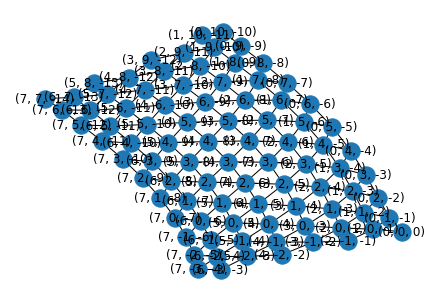

In [16]:
I = nx.Graph() # make graph
def make_network(row, col, graph):
    # create coordinates
    node_list = node_generation_v2(row, col)

    # add nodes to list
    add_nodes(node_list, graph)

    for node in graph.nodes:
        # for each node
        edge_list = find_consecutive_nodes(node, graph) # find the set of nodes that are consecutive and in the graph
        add_edges(edge_list, graph, node)

    nx.draw_spring(graph, with_labels=True) # draw graph


make_network(8, 11, I)

In [10]:
    H = nx.Graph()
node = (0,1,-1)


node_list = node_generation(3, 3)
print('node list', node_list)
add_nodes(node_list, H)


edge_list = find_consecutive_nodes(node, H)
print(edge_list)

add_edges(edge_list, H, node)

# for node in node_list:
#     edge_list = find_consecutive_nodes(node, H)
#     print(edge_list)
#     add_edges(edge_list, H, node)
# consecutive_positions((0,2,-2))

node list [(0, 0, 0), (0, 1, -1), (0, 2, -2), (1, 0, -1), (1, 1, -2), (1, 2, -3), (2, 0, -2), (2, 1, -3), (2, 2, -4)]
[(1, 1, -2), (1, 0, -1), (0, 0, 0), (-1, 1, 0), (-1, 2, -1), (0, 2, -2)]
the node, (-1, 1, 0) was not added as it is not in the Graph with 9 nodes and 0 edges
the node, (-1, 2, -1) was not added as it is not in the Graph with 9 nodes and 0 edges
[(1, 1, -2), (1, 0, -1), (0, 0, 0), (0, 2, -2)]


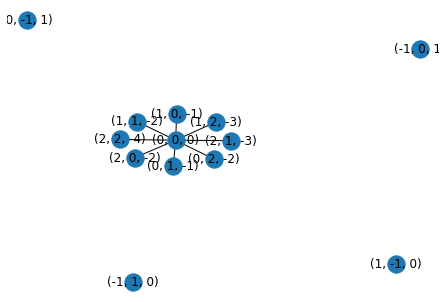